## <b>Intituto Politécnico de Portalegre
### Pós-Graduação em Data Science and Digital Transformation </b>
##### Análise de Dados e Aprendizagem Automática
##### Trabalho Prático 1
Aluno: Yvan Pereira de Oliveira

<b>0. Análise exploratória</b>

> Comece por ler o ficheiro de dados e analisar o seu conteúdo, extraindo toda a informação que lhe parecer relevante. Não se limite a usar as instruções que aprendeu, comente os resultados e torne a sua análise o mais rica possível.

In [2]:
# Importar as classes pertinentes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ler o arquivo de dados em formato dataframe
df = pd.read_csv('fishcatch.csv')

# Exibir as primeiras linhas do dataframe
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# Exibir as últimas linhas do dataframe
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [4]:
8# Obter as informações básicas sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Para extrair informações relevantes do conjunto de dados, pode-se realizar várias análises exploratórias. O trabalho irá começar imprimindo algumas informações básicas sobre o dataframe, como o número de linhas e colunas, os nomes das colunas e os tipos de dados de cada coluna. Isso ajudará a entender melhor a estrutura do conjunto de dados.

Pode-se usar os seguintes comandos para obter essas informações:

In [5]:
print("Número de linhas e colunas:", df.shape)

Número de linhas e colunas: (159, 7)


In [6]:
print("Colunas:", df.columns)

Colunas: Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')


In [7]:
print("Tipos de dados de cada coluna:")
print(df.dtypes)

Tipos de dados de cada coluna:
Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object


Pode-se perceber que o dataframe trata de um conjunto de informações de espécies de peixes, onde contém dados da estrutura dimensional física de diversos peixes para cada uma das espécies. Segue uma análise melhor desse conjunto a seguir.

In [8]:
# Contar o número de valores únicos em cada coluna
print('Valores únicos por coluna:')
df.nunique()

Valores únicos por coluna:


Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

Ao observar uma grande quantidade de valores únicos nas colunas de tamanho, comprimento e peso para as 7 espécies presentes, considerando o número de linhas total (159), tem-se que se tratam de dados não redundantes, tornando a lisura do processo de análise posterior mais acurado.

In [9]:
# Checar se há valores nulos
print("Valores ausentes por coluna:")
df.isnull().sum()

Valores ausentes por coluna:


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Não haver valor nulo no conjunto de dados favorece a análise do mesmo, anulando a necessidade de possível tratamento nesse quesito.

In [10]:
# Analisar a distribuição de variável de espécies
print('Distribuição de características para a variável "Species":')
df['Species'].value_counts()

Distribuição de características para a variável "Species":


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

A distribuição dos parâmetros tidos para cada tipo de espécie de peixe é exibida acima. Dessa informação, pode-se perceber que as espécies `Perch`, `Bream` e `Roach` contam com mais dados coletados que as demais, de forma que para uma futura análise, seus resultados podem ser validados de forma mais credibilizada que as espécies com menor comprimento de parâmetros vistos, que seria o caso das espécies `Smelt`, `Parkki` e, em especial, a `Whitefish`.

Além disso, pode-se calcular algumas estatísticas descritivas para cada coluna numérica, como média, desvio padrão, mínimo, máximo e quartis. Isso dará uma ideia da distribuição dos dados.

Pode-se usar o seguinte comando para calcular essas estatísticas:



In [11]:
# Calcular estatísticas descritivas para colunas numéricas
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


O valor mínimo na coluna `Weight` é 0 porque o método `describe()` calcula o valor mínimo para cada coluna, independentemente de haver algum valor 0 nessa coluna. Isso ocorre porque o valor mínimo para qualquer coluna pode teoricamente ser 0, mesmo que não haja valores reais de 0 na coluna.

Para confirmar isso, você pode usar o seguinte código para encontrar o valor mínimo na coluna `Weight`:

In [12]:
# Verificar no dataframe df se há algum valor númerico zerado (0)
df[df == 0].sum()

Species      0
Weight     0.0
Length1    0.0
Length2    0.0
Length3    0.0
Height     0.0
Width      0.0
dtype: object

Por fim, pode-se optar por demonstrar a correlação entre as variáveis tidas no dataframe, por meio do mapa de correlações, onde fica evidente quais são as relações entre os parâmetros disponíveis.

<ipython-input-13-004ea1177c5c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("crest", as_cmap=True))


Text(0.5, 1.0, 'Correlação entre as variáveis')

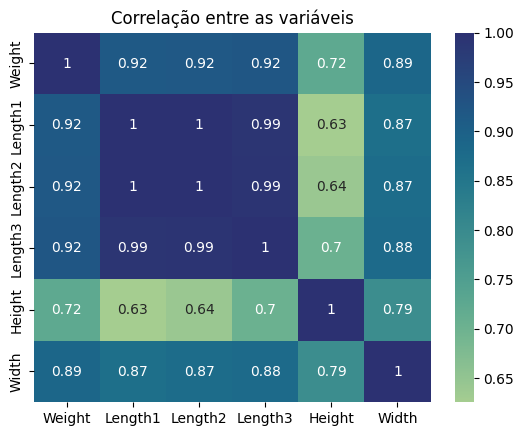

In [13]:
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette("crest", as_cmap=True))
plt.title('Correlação entre as variáveis')

Esse mapa é muito útil paras as análises posteriores. A mesma correlação pode ser alcançada calculando o coeficiente de correlação entre cada variável numérica e a variável alvo `Width`, como:

In [14]:
print('Coeficiente de correlação com a variável "Width":')
df.corr()['Width'].sort_values(ascending=False)

Coeficiente de correlação com a variável "Width":


<ipython-input-14-fdfe8066eee4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Width'].sort_values(ascending=False)


Width      1.000000
Weight     0.886507
Length3    0.878520
Length2    0.873547
Length1    0.867050
Height     0.792881
Name: Width, dtype: float64

Outras relações entre as variáveis podem ser obtidas por meio de exploração de gráficos relacionais. Seguem exemplos.

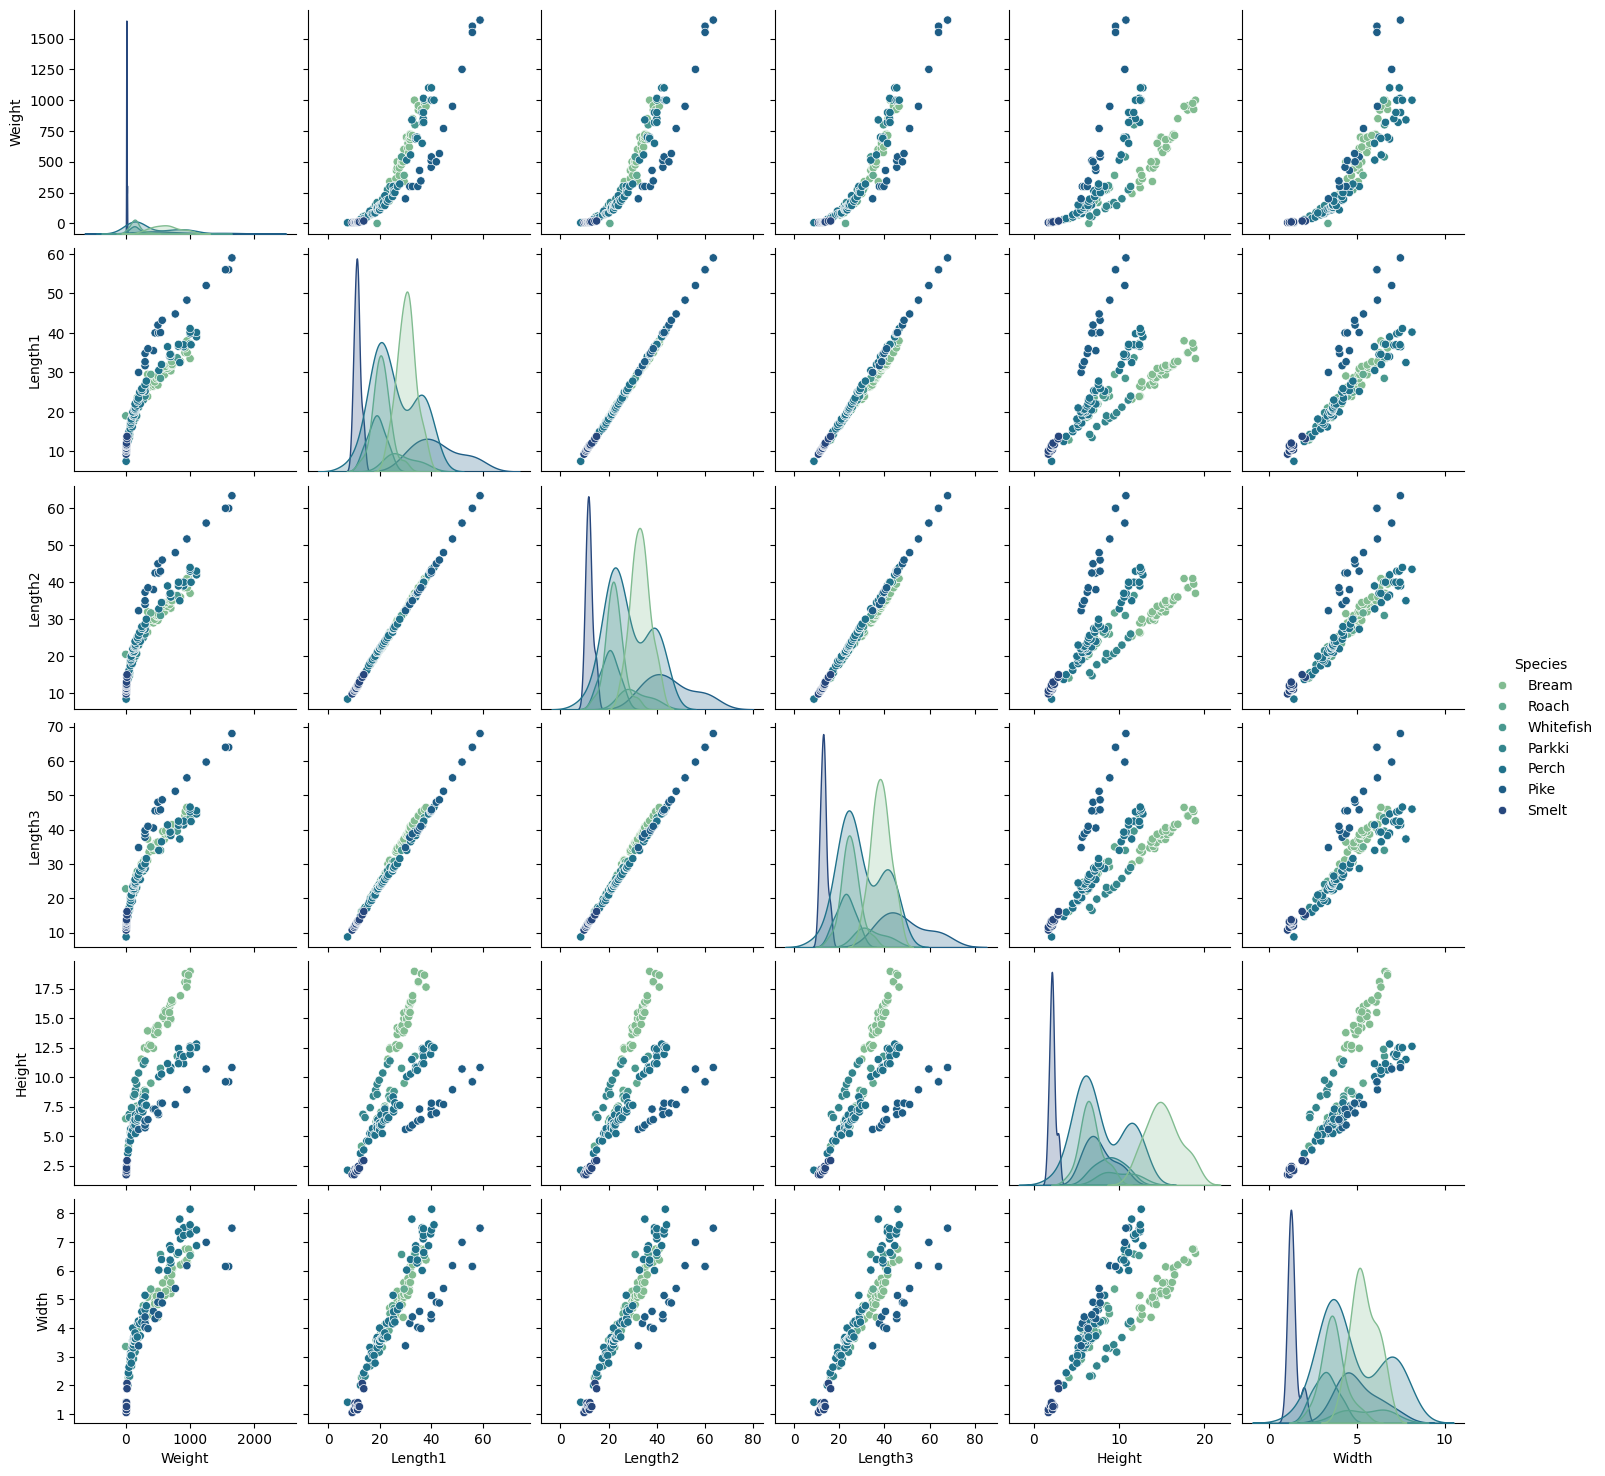

In [15]:
# Relação entre as variáveis do dataframe
sns.pairplot(df,  hue = 'Species', palette='crest')

<ipython-input-16-4cd987c8ce20>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Weight', y='Species', inner='stick', palette='crest')


Text(0.5, 1.0, 'Relação entre variáveis "Species" e "Weight"')

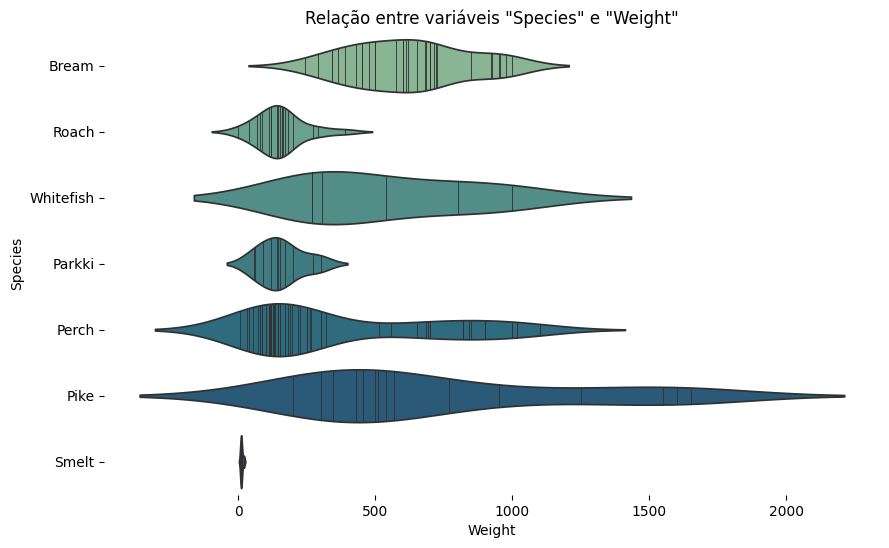

In [16]:
figsize = (10,6)
plt.figure(figsize=figsize)
sns.violinplot(df, x='Weight', y='Species', inner='stick', palette='crest')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Relação entre variáveis "Species" e "Weight"')

Do gráfico de violino nota-se a relação entre as espécies de peixe e seus respectivos pesos, de forma que pode concluir, por exemplo, que a espécie `Pike` é mais pesada que as demais espécies, bem como a `Smelt` é a mais leve.

<ipython-input-17-52b7af788a56>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y='Width', data=df, palette='crest')


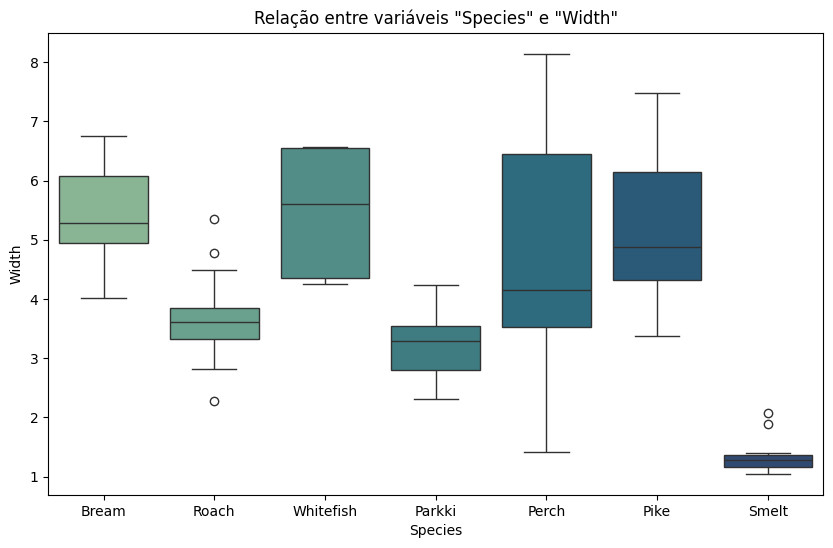

In [17]:
# Visualizar relação entre variáveis 'Species' e 'Weight' (espécies de peixe e peso)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='Width', data=df, palette='crest')
plt.title('Relação entre variáveis "Species" e "Width"')
plt.show()

Do gráfico `boxplot`, é possível capturar outliers, os limites superior e inferior e valores discrepantes das espécies em relação a variável `Width`.
Fica evidente, por exemplo, que a espécie `Roach` conta com outliers significativos em comparação com as demais espécies, que a média da largura da espécie `Whitefish` está bem centralizada, bem como as espécies `Roach`, `Parkki` e `Perch` contam com desvio padrão simétrico.

<b>1. Regressão Linear 1</b>

> A. Construir um modelo de regressão linear para prever a variável “Width” usando todas as características numéricas disponíveis. \
> B. Obter os coeficientes do modelo e identificar as características mais/menos relevantes para o modelo. Comentar face à análise inicial. \
> C. Obter as métricas do modelo (treino e teste) e comentar a qualidade do mesmo.

**Letra A. Construir um modelo de regressão linear para prever a variável “Width” usando todas as características numéricas disponíveis**

Escrevendo o modelo de ML com o `scikit-learn`

In [18]:
# Importar as classes pertinentes
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Extrair as variáveis numéricas (exluir a primeira 'Species' e a última 'Width') e definir a variável alvo
X = df[df.columns[1:6]]
y = df['Width']

# Criar o modelo de regressão lineat
model = linear_model.LinearRegression()

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=0)

# Treinar o modelo
model.fit(X_train, y_train)

# Prever os valores da variável alvo com base no modelo
y_pred = model.predict(X_test)

# Avaliar o modelo no conjunto de teste
score = model.score(X_test, y_test)

print("As previsões para a variável 'Widht' baseado no conjunto passado são:")
print(model.predict(X_test))

As previsões para a variável 'Widht' baseado no conjunto passado são:
[4.54404032 3.06435155 3.74392344 3.22218318 5.80771682 6.62533363
 5.92214815 4.52325061 7.57741064 3.39302923 3.82504158 5.09321441
 6.35186539 7.23545399 2.87908436 2.63228367 3.30664225 7.31386793
 3.56381022 5.9155502  2.93600118 4.60884005 3.5406802  7.69171346
 3.2302384  4.91376528 5.92089868 3.9507727  6.76241088 1.61943595
 5.39801369 3.36293044]


**Letra B. Obter os coeficientes do modelo e identificar as características mais/menos relevantes para o modelo. Comentar face à análise inicial.**

As características mais relevantes para o modelo são aquelas com os maiores coeficientes absolutos.

In [19]:
# Imprimir as respectivas colunas junto aos valores dos coeficientes
print(f"Coeficientes do modelo:")
for feature, coef in zip(X.columns, model.coef_):
  print(f"{feature}: {coef}")

Coeficientes do modelo:
Weight: 0.0004306039276505947
Length1: 0.004337823816265976
Length2: 0.5863789846952902
Length3: -0.5020493503261834
Height: 0.2952233604141301


Existem algumas explicações possíveis para o motivo pelo qual os coeficientes do modelo não condizem com o mapa de correlações.

* **O modelo está superajustado.** Isso significa que o modelo aprendeu muito bem os dados de treinamento e não é capaz de generalizar para novos dados. Isso pode ser corrigido usando uma técnica de regularização, como regularização L1 ou L2.
* **O modelo não é complexo o suficiente.** Isso significa que o modelo não é capaz de capturar as relações entre as variáveis nos dados. Isso pode ser corrigido usando um modelo mais complexo, como uma floresta aleatória ou uma rede neural.
* **Os dados não estão limpos.** Isso significa que há erros ou valores discrepantes nos dados. Isso pode ser corrigido limpando os dados ou usando uma técnica de regressão robusta.

Considerando que os dados já foram revisados e que o modelo não conta com elevada complexidade, uma hipótese seria a de que o modelo se encontra superajustado. Para verificar tal condição, optou-se por empregar as técnicas de regularização L1 e L2 para verificar se os coeficientes do modelo podem ser mais coerentes com o mapa de correlações.

In [20]:
# Técnica de regularização L1 e L2

# Importar a classe dos métodos
from sklearn.linear_model import Lasso, Ridge

# L1 Regularization
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print('Método de Lasso:')
print(lasso_coef.sort_values(ascending=False))

print()

# L2 Regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_coef = pd.Series(ridge.coef_, index=X.columns)
print('Método de Ridge:')
print(ridge_coef.sort_values(ascending=False))


Método de Lasso:
Length3    0.013029
Weight     0.004090
Length1    0.000000
Length2    0.000000
Height     0.000000
dtype: float64

Método de Ridge:
Length2    0.521921
Height     0.292834
Length1    0.055417
Weight     0.000451
Length3   -0.486427
dtype: float64


Mesmo após empregar os métodos de Lasso e de Ridge, constata-se que os coeficientes do modelo não se relacionam como os coeficientes do mapa de correlações das variáveis presentes no dataframe, o que demonstra que as variáveis não possuem necessariamente uma relação linear. Opta-se por seguir com a análise.

A equação da linha de regressão é: \
$y = m_1 \cdot x_1 + m_2 \cdot x_2 + m_3 \cdot x_3 + m_4 \cdot x_4 + m_5 \cdot x5 + b$\
Onde: \
$y$ é o valor previsto da variável dependente \
$x_1, x_2, x_3, x_4, x_5$ são as variáveis ​​independentes \
$m_1, m_2, m_3, m_4, m_5$ são os coeficientes das variáveis independentes \
$b$ é a interceptação \

In [21]:
# Os coeficientes do modelo são armazenados no atributo `coef_` do objeto do modelo
coefficients = model.coef_

# A interceptação do modelo é armazenada no atributo `intercept_` do objeto do modelo
intercept = model.intercept_

# A equação da reta de regressão
equation = f"y = {coefficients[0]:.3f} * x1 + {coefficients[1]:.3f} * x2 + {coefficients[2]:.3f} * x3 + {coefficients[3]:.3f} * x4 + {coefficients[4]:.3f} * x5 + {intercept:.3f}"

# Imprimir a equação da linha de regressão
print('Equação do modelo de regressão linear:')
print(equation)


Equação do modelo de regressão linear:
y = 0.000 * x1 + 0.004 * x2 + 0.586 * x3 + -0.502 * x4 + 0.295 * x5 + 0.496


Gráfico do modelo de regressão linear sobreposta aos dados de treino:

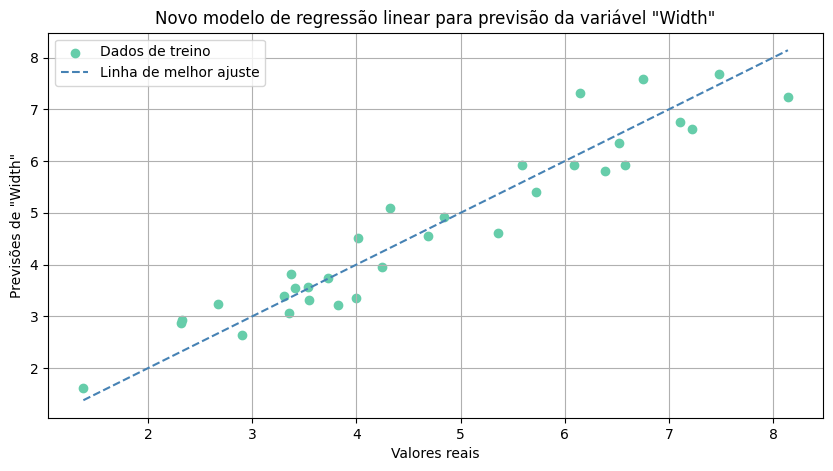

In [22]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='mediumaquamarine', label='Dados de treino')

# Adicionar linha de melhor ajuste
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='steelblue', linestyle='--', label='Linha de melhor ajuste')

plt.title('Novo modelo de regressão linear para previsão da variável "Width"')
plt.xlabel('Valores reais')
plt.ylabel('Previsões de "Width"')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Identificar as características mais e menos relevantes para o modelo
important_features = []
less_important_features = []
for i, coef in enumerate(model.coef_):
    if abs(coef) > 0.5:
        important_features.append(X.columns[i])
    elif abs(coef) < 0.1:
        less_important_features.append(X.columns[i])

# Imprimir as características mais/menos relevantes
print(f"Características mais relevantes: {important_features}")
print(f"Características menos relevantes: {less_important_features}")


Características mais relevantes: ['Length2', 'Length3']
Características menos relevantes: ['Weight', 'Length1']


Embora as correlações entre as variáveis tenham sido identificadas na análise exploratória inicial, por meio dos coeficientes gerados pelo modelo, tem-se que os parâmetros `Weight` e `Lenght1` não enriquecem tanto a Análise de Regressão quanto as outras características, em especial o `Weight`, demostrando que este possui uma relação não linear com a característica `Width`. Ressalta-se que os coeficientes sugerem justamente que o modelo de regressão linear é capaz de capturar as relações entre essas características e a variável alvo (Width).



**Letra C. Obter as métricas do modelo (treino e teste) e comentar a qualidade do mesmo.**

In [24]:
# Imprimir o Coeficiente de Determinação do modelo de treino e teste
print(f"R² de treino: {model.score(X_train,y_train)}")
print(f"R² de teste: {model.score(X_test,y_test)}")

R² de treino: 0.9192472317792524
R² de teste: 0.9130266822384038


Após obter as métricas de treino e teste do modelo de regressão linear e observar os Coeficientes de Determinação $R^2$ tidos como resultados, verifica-se que o modelos construído possui qualidade em sua Análise de Regressão, visto que obtém valores próximos de $1$, o que expressa o quanto o modelo explica o resultado, e quanto mais próximo de $1$, melhor. Para avaliar o modelo outros parâmetros também podem ser mensurados para afirmar tal qualidade, como o erro médio do modelo, como segue:

In [25]:
# Importar as classes pertinentes
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Erro  médio absoluto (MAE) = %.2f' % mean_absolute_error( y_test, y_pred))
print('Erro  médio quadrático (MSE) = %.2f' % mean_squared_error( y_test, y_pred))
print('Coeficiente de Determinação do modelo (R²): %.2f' % r2_score(y_test, y_pred) )

Erro  médio absoluto (MAE) = 0.42
Erro  médio quadrático (MSE) = 0.26
Coeficiente de Determinação do modelo (R²): 0.91


Como pode ser observado acima, os erros médio e absoluto do modelo gerado são baixos enquanto o $R^2$ foi próximo de $1$, o que também revela uma boa qualidade do modelo.

<B>2. Regressão Linear 2</B>

> A. Construir um novo modelo de regressão linear depois de excluir uma das características numéricas disponíveis. Escolher criteriosamente a característica a excluir e justificar a escolha. \
> B. Obter as métricas do modelo e comentar com os valores obtidos em 1. É o que se esperava? Justifique.



**Letra A. Construir um novo modelo de regressão linear depois de excluir uma das características numéricas disponíveis. Escolher criteriosamente a característica a excluir e justificar a escolha.**

O característica selecionada para exclusão será a que tem o menor coeficiente do modelo, no caso o `Weight`, visto que corresponde a menor relação com a variável alvo `Widht`, como já demonstrado anteriormente.


In [26]:
# Recriar as variáveis numéricas (todas exceto 'Weight' e a própria 'Width') e definir a variável alvo
X2 = df[df.columns[2:6]]
y2 = df['Width']

# Criando o modelo de regressão lineat
new_model = LinearRegression()

# Dividir os dados em conjuntos de treinamento e teste
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=.8, test_size=.2, random_state=0)

# Treinando o modelo
new_model.fit(X_train2, y_train2)

# Avaliar o modelo no conjunto de teste
new_score = new_model.score(X_test2, y_test2)

print("As previsões para a variável 'Widht' baseado no novo conjunto são:")
print(new_model.predict(X_test2))

As previsões para a variável 'Widht' baseado no novo conjunto são:
[4.5783595  3.13149058 3.76743809 3.22653643 5.83568854 6.56816955
 5.86340109 4.61709203 7.55129219 3.40466484 3.89773061 5.18860842
 6.25385075 7.18089821 2.88132839 2.63553299 3.33172677 7.09096717
 3.58049871 5.8974112  2.9374943  4.64796342 3.56523425 7.48267096
 3.24884166 4.94318105 5.90769204 3.95988613 6.73046504 1.55348808
 5.38515656 3.38174303]


**Letra B.  Obter as métricas do modelo e comentar com os valores obtidos em 1. É o que se esperava? Justifique.**

In [27]:
# Imprimir o Coeficiente de Determinação do novo modelo de teste e treino
print(f"Novo R² de treino: {new_model.score(X_train2, y_train2)}")
print(f"Novo R² de teste: {new_model.score(X_test2, y_test2)}")

Novo R² de treino: 0.9184028030962672
Novo R² de teste: 0.9137222644568705


In [28]:
# Prever os valores da variável alvo com base nos dados de teste no novo modelo
y_pred2 = new_model.predict(X_test2)

print('Novo erro  médio absoluto (MAE) = %.2f' % mean_absolute_error( y_test2, y_pred2))
print('Novo erro  médio quadrático (MSE) = %.2f' % mean_squared_error( y_test2, y_pred2),'\n')
print('Coeficiente de Determinação do primeiro modelo (R²): %.2f' % r2_score(y_test, y_pred))
print('Coeficiente de Determinação do segundo modelo (R²): %.2f' % r2_score(y_test2, y_pred2))

Novo erro  médio absoluto (MAE) = 0.42
Novo erro  médio quadrático (MSE) = 0.25 

Coeficiente de Determinação do primeiro modelo (R²): 0.91
Coeficiente de Determinação do segundo modelo (R²): 0.91


O primeiro modelo de regressão linear foi construído utilizando todas as características numéricas disponíveis, enquanto o segundo modelo foi construído após a exclusão da característica com menor coeficiente, que foi o `Weight`.

A pontuação $R^2$ (teste) do primeiro modelo foi de $0.9130$, enquanto a pontuação $R^2$ do segundo modelo foi de $0.9137$. O erro médio absoluto (MAE) não demonstrou variação entre os modelos, enquanto o erro médio quadrático teve diferença de um centésimo a menos para o segundo modelo ($0,25$ contra $0,26$ do primeiro modelo).

Isso era o esperado, pois a remoção de um parâmetro que não está fortemente correlacionado com a variável alvo não deveria afetar significativamente o desempenho do modelo.

Nesse caso, a diferença na pontuação $R^2$ entre os dois modelos é muito pequena, o que sugere que a característica `Weight` não tem impacto significativo na capacidade do modelo de prever a variável alvo.

Portanto, é razoável concluir que o segundo modelo é tão bom quanto o primeiro modelo e é mais simples porque possui menos variáveis.

O gráfico a seguir ilustra o novo modelo de regressão linear frente aos dados de treino, similar ao do primeiro modelo.

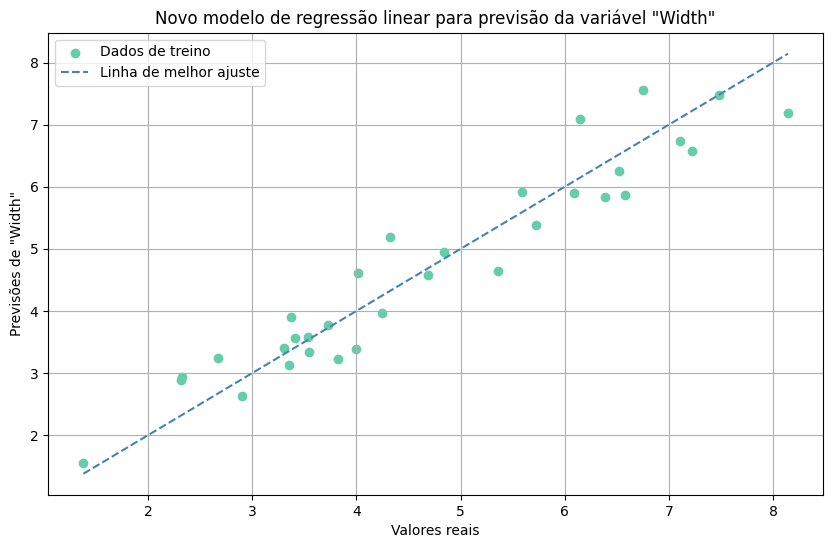

In [29]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred2, color='mediumaquamarine', label='Dados de treino')

# Adicionar linha de melhor ajuste
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='steelblue', linestyle='--', label='Linha de melhor ajuste')

plt.title('Novo modelo de regressão linear para previsão da variável "Width"')
plt.xlabel('Valores reais')
plt.ylabel('Previsões de "Width"')
plt.legend()
plt.grid(True)
plt.show()

<b>3. Regressão Polinomial</b>
> A. Escolher uma única característica para criar um modelo de regressão polinomial simples. Justificar a
escolha da característica. \
> B. Registar as métricas do modelo e comparar com o que se obteria num modelo linear apenas com essa
característica. \
> C. Construir alguns modelos fazendo variar o grau do polinómio. Qual o grau de polinómio que melhor se
adequa ao problema? \
> D. Construir um gráfico de dispersão (variável “Width” em função da característica escolhida) e
representar cada um dos modelos treinados neste ponto. Comentar o gráfico.


**Letra A. Escolher uma única característica para criar um modelo de regressão polinomial simples. Justificar a escolha da característica.**

O critério de seleção de uma única característica para se basear o modelo de regressão polinomial simples será a variável que obtiver maior correlação com a variável alvo (Width), que no caso é o parâmetro `Length2`.

In [30]:
# Importar a classe pertinente
from sklearn.preprocessing import PolynomialFeatures

# Extrair a variávei numérica e definir a variável alvo
X3 = df[['Length2']]#.values.reshape(-1, 1)
y3 = df['Width']

# Criando o modelo de regressão polinomial simples
model_poly = PolynomialFeatures(degree=2)

# Transformar os dados
X_poly = model_poly.fit_transform(X3)

# Dividir os dados em conjuntos de treinamento e teste já transformados
Xpoly_train, Xpoly_test, y_train3, y_test3 = train_test_split(X_poly, y3, train_size=.8, test_size=.2, random_state = 0)

# Criar o modelo de regressão linear
model_transf = linear_model.LinearRegression()

# Treinar o modelo
model_transf.fit(Xpoly_train, y_train3)

# Avaliar o modelo
print("R² do conjunto de treino:", model_transf.score(Xpoly_train, y_train3))

R² do conjunto de treino: 0.860932958309619


**Letra B. Registar as métricas do modelo e comparar com o que se obteria num modelo linear apenas com essa característica.**

Caso fosse um modelo de regressão linear simples:

In [31]:
# Dividir os dados em conjuntos de treinamento e teste (base original de dados)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size=.8, test_size=.2, random_state = 0)

# Criando o modelo de regressão linear simples
model_linear_simple = LinearRegression()

# Treinar o modelo
model_linear_simple.fit(X_train3, y_train3)

# Prever os valores da variável alvo com base nos dados de teste
ypoly_pred = model_transf.predict(Xpoly_test)
y_pred3 = model_linear_simple.predict(X_test3)

print('Previsões para a variável Widht do modelo polinomial \n', ypoly_pred,'\n')
print('Previsões para a variável Widht do modelo linear \n', y_pred3,'\n')

from sklearn.metrics import r2_score

# Comparar as métricas dos dois modelos
print("R² de teste do modelo polinomial simples:", r2_score(y_test3, ypoly_pred))
print("R² de teste do modelo linear simples:", r2_score(y_test3, y_pred3),'\n')

print("Erro  médio absoluto (MAE) do modelo polinomial = %.2f" % mean_absolute_error( y_test3, ypoly_pred))
print("Erro  médio quadrático (MSE) do modelo polinomial = %.2f" % mean_squared_error( y_test3, ypoly_pred),'\n')

print("Erro  médio absoluto (MAE) do modelo linear = %.2f" % mean_absolute_error( y_test3, y_pred3))
print("Erro  médio quadrático (MSE) do modelo linear = %.2f" % mean_squared_error( y_test3, y_pred3))

Previsões para a variável Widht do modelo polinomial 
 [5.01105153 3.36607619 3.94917048 3.7613317  5.58468174 6.10632064
 5.78720315 5.8749116  6.17995461 3.46733732 5.32075105 6.27816934
 6.10632064 6.33548834 2.26373261 3.00958477 3.66496507 6.33906228
 3.52731087 5.64026094 2.07221735 5.24328813 3.66496507 6.11902453
 2.76886383 5.01105153 5.64026094 4.47353087 6.10632064 1.13213038
 5.46862884 3.66496507] 

Previsões para a variável Widht do modelo linear 
 [4.65555364 3.29213172 3.72268601 3.57916792 5.30138508 6.09073461
 5.57406947 5.70323575 6.23425271 3.36389077 4.98564527 6.44952986
 6.09073461 6.59304795 2.57454124 3.04815096 3.50740887 8.96109656
 3.4069462  5.37314413 2.45972676 4.89953441 3.50740887 9.44905809
 2.89028105 4.65555364 5.37314413 4.15324031 6.09073461 1.9287098
 5.15786698 3.50740887] 

R² de teste do modelo polinomial simples: 0.7767540917576812
R² de teste do modelo linear simples: 0.6716213985874742 

Erro  médio absoluto (MAE) do modelo polinomial = 0.5

O modelo de regressão polinomial apresenta valor de $R_2$ superior ao modelo de regressão linear, o que significa que se ajusta melhor aos dados. Isso ocorre porque o modelo de regressão polinomial é capaz de capturar a relação não linear entre o peso e a largura do peixe. O modelo de regressão linear, por outro lado, só consegue capturar relações lineares. Isso fica evidente também ao comparar os erros MAE e MSE entre os modelos, onde o modelo polinomial simples apresenta erros menores, indicando maior confiança e melhor precisão na sua execução.

O gráfico a seguir mostra os pontos de dispersão com os dados reais e a sobreposição dos modelos contruídos, onde se adequam a linha de melhor ajuste para os dois modelos:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


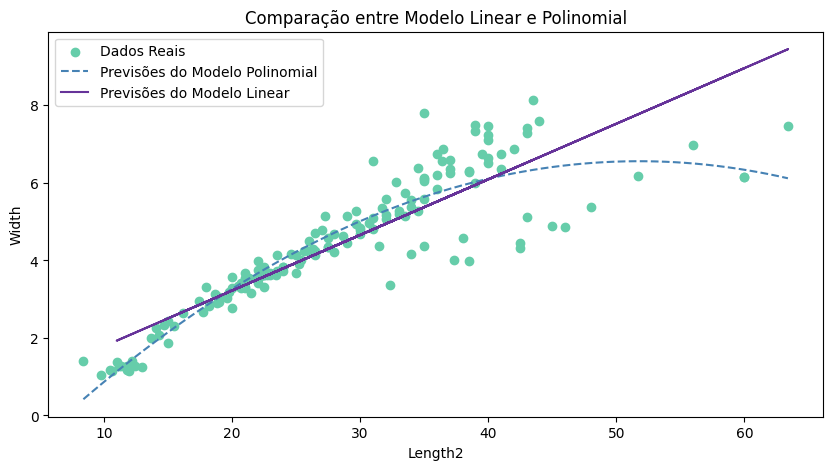

In [32]:
# Importar classe pertinente
import numpy as np

# Gerar valores ao longo do intervalo dos dados de entrada
x_values = np.linspace(X3.min(), X3.max(), 70).reshape(-1, 1)

# Transformar os valores para polinômios
x_poly_values = model_poly.transform(x_values)

# Fazer previsões para os valores polinomiais
y_pred_poly_values = model_transf.predict(x_poly_values)

# Plotar os dados reais
plt.figure(figsize=(10, 5))
plt.scatter(X3, y3, color='mediumaquamarine', label='Dados Reais')

# Plotar a linha de regressão polinomial
plt.plot(x_values, y_pred_poly_values, color='steelblue', linestyle='--', label='Previsões do Modelo Polinomial')

# Plotar as previsões do modelo linear
plt.plot(X_test3, y_pred3, color='rebeccapurple', label='Previsões do Modelo Linear')

plt.title('Comparação entre Modelo Linear e Polinomial')
plt.xlabel('Length2')
plt.ylabel('Width')
plt.legend()
plt.show()

Como já constatado anteriormente, é possível notar que o ajuste flexível da curva do modelo polinomial se adequa melhor aos dados do que a linha do modelo de regressão linear.

**Letra C. Construir alguns modelos fazendo variar o grau do polinómio. Qual o grau de polinómio que melhor se adequa ao problema?**

In [33]:
# Criar 6 modelos polinomiais fazendo variar o grau do polinómio
model_poly2 = PolynomialFeatures(degree=2)
model_poly3 = PolynomialFeatures(degree=3)
model_poly4 = PolynomialFeatures(degree=4)
model_poly5 = PolynomialFeatures(degree=5)
model_poly6 = PolynomialFeatures(degree=6)
model_poly7 = PolynomialFeatures(degree=7)

# Transformar os dados
X_poly2 = model_poly2.fit_transform(X3)
X_poly3 = model_poly3.fit_transform(X3)
X_poly4 = model_poly4.fit_transform(X3)
X_poly5 = model_poly5.fit_transform(X3)
X_poly6 = model_poly6.fit_transform(X3)
X_poly7 = model_poly7.fit_transform(X3)

# Dividir os dados em conjuntos de treinamento e teste já transformados
Xpoly2_train, Xpoly2_test, y_train3_2, y_test3_2 = train_test_split(X_poly2, y3, train_size=.8, test_size=.2, random_state = 0)
Xpoly3_train, Xpoly3_test, y_train3_3, y_test3_3 = train_test_split(X_poly3, y3, train_size=.8, test_size=.2, random_state = 0)
Xpoly4_train, Xpoly4_test, y_train3_4, y_test3_4 = train_test_split(X_poly4, y3, train_size=.8, test_size=.2, random_state = 0)
Xpoly5_train, Xpoly5_test, y_train3_5, y_test3_5 = train_test_split(X_poly5, y3, train_size=.8, test_size=.2, random_state = 0)
Xpoly6_train, Xpoly6_test, y_train3_6, y_test3_6 = train_test_split(X_poly6, y3, train_size=.8, test_size=.2, random_state = 0)
Xpoly7_train, Xpoly7_test, y_train3_7, y_test3_7 = train_test_split(X_poly7, y3, train_size=.8, test_size=.2, random_state = 0)

# Criar o modelo de regressão linear
model_transf2 = linear_model.LinearRegression()
model_transf3 = linear_model.LinearRegression()
model_transf4 = linear_model.LinearRegression()
model_transf5 = linear_model.LinearRegression()
model_transf6 = linear_model.LinearRegression()
model_transf7 = linear_model.LinearRegression()

# Treinar os modelos
model_transf2.fit(Xpoly2_train, y_train3_2)
model_transf3.fit(Xpoly3_train, y_train3_3)
model_transf4.fit(Xpoly4_train, y_train3_4)
model_transf5.fit(Xpoly5_train, y_train3_5)
model_transf6.fit(Xpoly6_train, y_train3_6)
model_transf7.fit(Xpoly7_train, y_train3_7)

# Avaliar os modelos
print("R² do modelo polinomial de grau 2:", model_transf2.score(X_poly2, y3))
print("R² do modelo polinomial de grau 3:", model_transf3.score(X_poly3, y3))
print("R² do modelo polinomial de grau 4:", model_transf4.score(X_poly4, y3))
print("R² do modelo polinomial de grau 5:", model_transf5.score(X_poly5, y3))
print("R² do modelo polinomial de grau 6:", model_transf6.score(X_poly6, y3))
print("R² do modelo polinomial de grau 7:", model_transf7.score(X_poly7, y3),'\n')


print("Erro  médio absoluto (MAE) do modelo polinomial de grau 2 = %.2f" % mean_absolute_error( y_test3_2, model_transf2.predict(Xpoly2_test)))
print("Erro  médio quadrático (MSE) do modelo polinomial de grau 2 = %.2f" % mean_squared_error( y_test3_2, model_transf2.predict(Xpoly2_test)),'\n')

print("Erro  médio absoluto (MAE) do modelo polinomial de grau 3 = %.2f" % mean_absolute_error( y_test3_3, model_transf3.predict(Xpoly3_test)))
print("Erro  médio quadrático (MSE) do modelo polinomial de grau 3 = %.2f" % mean_squared_error( y_test3_3, model_transf3.predict(Xpoly3_test)),'\n')

print("Erro  médio absoluto (MAE) do modelo polinomial de grau 4 = %.2f" % mean_absolute_error( y_test3_4, model_transf4.predict(Xpoly4_test)))
print("Erro  médio quadrático (MSE) do modelo polinomial de grau 4 = %.2f" % mean_squared_error( y_test3_4, model_transf4.predict(Xpoly4_test)),'\n')

print("Erro  médio absoluto (MAE) do modelo polinomial de grau 5 = %.2f" % mean_absolute_error( y_test3_5, model_transf5.predict(Xpoly5_test)))
print("Erro  médio quadrático (MSE) do modelo polinomial de grau 5 = %.2f" % mean_squared_error( y_test3_5, model_transf5.predict(Xpoly5_test)),'\n')

print("Erro  médio absoluto (MAE) do modelo polinomial de grau 6 = %.2f" % mean_absolute_error( y_test3_6, model_transf6.predict(Xpoly6_test)))
print("Erro  médio quadrático (MSE) do modelo polinomial de grau 6 = %.2f" % mean_squared_error( y_test3_6, model_transf6.predict(Xpoly6_test)),'\n')

print("Erro  médio absoluto (MAE) do modelo polinomial de grau 7 = %.2f" % mean_absolute_error( y_test3_7, model_transf7.predict(Xpoly7_test)))
print("Erro  médio quadrático (MSE) do modelo polinomial de grau 7 = %.2f" % mean_squared_error( y_test3_7, model_transf7.predict(Xpoly7_test)),'\n')

R² do modelo polinomial de grau 2: 0.8443135401641153
R² do modelo polinomial de grau 3: 0.8410087092811906
R² do modelo polinomial de grau 4: 0.8502088871142777
R² do modelo polinomial de grau 5: 0.8535743309140787
R² do modelo polinomial de grau 6: 0.8535391572101021
R² do modelo polinomial de grau 7: 0.6903192471941664 

Erro  médio absoluto (MAE) do modelo polinomial de grau 2 = 0.54
Erro  médio quadrático (MSE) do modelo polinomial de grau 2 = 0.66 

Erro  médio absoluto (MAE) do modelo polinomial de grau 3 = 0.55
Erro  médio quadrático (MSE) do modelo polinomial de grau 3 = 0.73 

Erro  médio absoluto (MAE) do modelo polinomial de grau 4 = 0.52
Erro  médio quadrático (MSE) do modelo polinomial de grau 4 = 0.64 

Erro  médio absoluto (MAE) do modelo polinomial de grau 5 = 0.48
Erro  médio quadrático (MSE) do modelo polinomial de grau 5 = 0.61 

Erro  médio absoluto (MAE) do modelo polinomial de grau 6 = 0.49
Erro  médio quadrático (MSE) do modelo polinomial de grau 6 = 0.61 

Erro

A escolha do grau do polinômio em um modelo de regressão polinomial simples é um aspecto crucial para garantir um bom ajuste aos dados. Um grau de polinômio muito baixo pode não capturar a complexidade dos dados, enquanto um grau muito alto pode levar ao overfitting, ou seja, o modelo pode se ajustar demasiadamente aos dados de treinamento e falhar em generalizar para novos dados.

Considerando as métricas de avaliação dos modelos com graus variando entre 2 e 7, tem-se que o polinômio que melhor se adequa ao problema é o de grau 5, visto que observa-se que a partir do grau 2, os erros MAE e MSE vão gradativamente diminuindo, de forma que alcançam seu menor valor com o modelo de grau 5 ($MAE = 0.48$ e $MSE = 0.61$), sendo isso também alinhado ao fato de nesse ponto ser encontrato o maior Coeficiente de Determinação $R^2$ ($0.85357$), o que indica que os valores previstos pelo modelo de grau 5 se ajustam aos valores reais observados de maneira mais satisfatória que os demais polinômios. A partir do grau 6 nota-se um aumento dos valores dos erros mensurados e uma diminuição de $R^2$, o que demonstra overfitting do modelo, ou seja, o modelo parece ter se ajustado muito bem aos dados de treino, mas começou a não generalizar bem para novos dados.

**Letra D. Construir um gráfico de dispersão (variável “Width” em função da característica escolhida) e representar cada um dos modelos treinados neste ponto. Comentar o gráfico.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

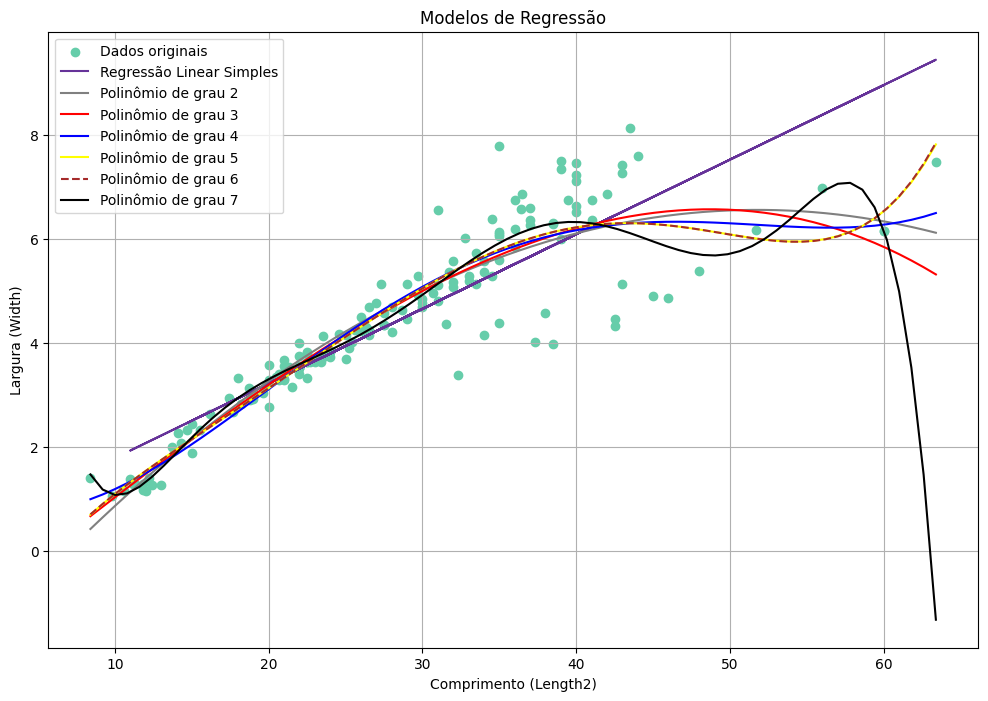

In [34]:
# Importar a classe pertinente
import numpy as np

# Gerar valores preditos para os modelos polinomiais
X_range = np.linspace(X3.min(), X3.max(), 70).reshape(-1, 1)
X_range_poly2 = model_poly2.transform(X_range)
X_range_poly3 = model_poly3.transform(X_range)
X_range_poly4 = model_poly4.transform(X_range)
X_range_poly5 = model_poly5.transform(X_range)
X_range_poly6 = model_poly6.transform(X_range)
X_range_poly7 = model_poly7.transform(X_range)

y_pred_poly2 = model_transf2.predict(X_range_poly2)
y_pred_poly3 = model_transf3.predict(X_range_poly3)
y_pred_poly4 = model_transf4.predict(X_range_poly4)
y_pred_poly5 = model_transf5.predict(X_range_poly5)
y_pred_poly6 = model_transf6.predict(X_range_poly6)
y_pred_poly7 = model_transf7.predict(X_range_poly7)

# Plotar o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(X3, y3, color='mediumaquamarine', label='Dados originais')

plt.plot(X_test3, y_pred3, color='rebeccapurple', label='Regressão Linear Simples')
plt.plot(X_range, y_pred_poly2, color='gray', label='Polinômio de grau 2')
plt.plot(X_range, y_pred_poly3, color='red', label='Polinômio de grau 3')
plt.plot(X_range, y_pred_poly4, color='blue', label='Polinômio de grau 4')
plt.plot(X_range, y_pred_poly5, color='yellow', label='Polinômio de grau 5')
plt.plot(X_range, y_pred_poly6, color='brown', label='Polinômio de grau 6', linestyle='--')
plt.plot(X_range, y_pred_poly7, color='black', label='Polinômio de grau 7')

plt.xlabel('Comprimento (Length2)')
plt.ylabel('Largura (Width)')
plt.title('Modelos de Regressão')
plt.legend()
plt.grid(True)
plt.show()


Quanto maior o grau do polinômio, mais flexível é o modelo, o que pode resultar em um ajuste mais próximo aos dados de treinamento.
Modelos de grau muito alto podem capturar até mesmo o ruído nos dados de treinamento, levando a overfitting, onde o modelo se ajusta excessivamente aos dados de treinamento e não consegue generalizar bem para novos dados.
Modelos de grau baixo podem não ser flexíveis o suficiente para capturar a relação subjacente nos dados, resultando em underfitting.
O objetivo é encontrar um equilíbrio entre bias (viés) e variância, escolhendo um modelo que tenha um bom desempenho tanto nos dados de treinamento quanto nos dados de teste.

Pelo gráfico fica visível que os modelos de regressão polinomial podem se ajustar melhor aos dados de treino do que o modelo de regressão linear simples, em especial o de grau 5, com resultado visual muito semelhante ao de grau 6 (por conta do efeito disso, foi diferenciado o traçado da curva).

O modelo polinomial de grau 7, com métricas inferiores a todos os demais modelos, apresenta uma curva mais discrepante com as previsões da variável alvo, devido a estar sofrendo de overfitting, como indicado pelos seus maiores erros de teste (MAE e MSE).

Por outro lado, o modelo de grau 2 parece estar sofrendo de underfitting, pois, condizente com seu R² mais baixo em comparação com os modelos de grau superior, não apresenta uma curva muito flexível aos dados de treino.

Em resumo, o gráfico mostra como diferentes modelos polinomiais se ajustam aos dados, levando em consideração tanto a complexidade do modelo quanto as métricas de desempenho previamente calculadas. Dessa forma, é possível definir o modelo que melhor equilibra a capacidade de ajuste aos dados e a capacidade de generalização para novos dados, que no caso seria o modelo de regressão polinomial de `grau 5`.

4. Regressão Linear e Polinomial
> A. Construir um modelo misto - linear e polinomial. Para a componente polinomial usar a característica selecionada no ponto anterior, e o grau de polinómio considerado ótimo. Para a componente linear, usar as restantes características numéricas. \
> B. Registar as métricas do modelo e comparar com o modelo inicial.

**Letra A. Construir um modelo misto - linear e polinomial. Para a componente polinomial usar a característica selecionada no ponto anterior, e o grau de polinómio considerado ótimo. Para a componente linear, usar as restantes características numéricas.**

In [35]:
# Extrair a variável numérica e definir a variável alvo
X4_poly = df['Length2'].values.reshape(-1, 1)
X4_linear = df[df.columns[1:6]]
X4_linear.drop('Length2',axis=1,inplace=True) #Apaga o variável selecionada para o modelo polinomial
y4 = df['Width']

# Criando o modelo de regressão polinomial com grau ótimo
model_poly4 = PolynomialFeatures(degree=5)

# Transformar os dados
X4_poly = model_poly4.fit_transform(X4_poly)

# Dividir os dados em conjuntos de treinamento e teste já transformados para o modelo polinomial
X4poly_train, X4poly_test, X4linear_train, X4linear_test, y_train4, y_test4 = train_test_split(X4_poly, X4_linear, y4, train_size=.8, test_size=.2, random_state = 0)

# Criar o modelo de regressão linear
model_poly4 = LinearRegression()

# Treinar o modelo
model_poly4.fit(X4poly_train, y_train4)

# Criando o modelo de regressão linear simples
model_linear4 = LinearRegression()

# Treinar o modelo
model_linear4.fit(X4_linear, y4)

# Combinar os dados de treino e de teste dos dois modelos
X_combined_train = np.concatenate((X4poly_train, X4linear_train), axis=1)
X_combined_test = np.concatenate((X4poly_test, X4linear_test), axis=1)

# Criar e treinar o modelo combinado
model_combined = LinearRegression()
model_combined.fit(X_combined_train, y_train4)

# Previsão dos valores da variável alvo com base nos dados de teste do modelo combinado
y_pred4 = model_combined.predict(X_combined_test)

<ipython-input-35-ff34cc2a2d6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4_linear.drop('Length2',axis=1,inplace=True) #Apaga o variável selecionada para o modelo polinomial


**Letra B. Registar as métricas do modelo e comparar com o modelo inicial.**

In [36]:
# Avaliar o modelo combinado
print("R² do modelo combinado:", model_combined.score(X_combined_test, y_test4))

# Comparar com o modelo inicial
print("R² do modelo inicial:", model.score(X_test, y_test),'\n')

# Comparação do modelo combinado e do modelo inicial
print("Erro  médio absoluto (MAE) do modelo combinado = %.2f" % mean_absolute_error(y_test4, y_pred4))
print("Erro  médio absoluto (MAE) do modelo inicial = %.2f" % mean_absolute_error(y_test, y_pred),'\n')
print("Erro  médio quadrático (MSE) do modelo combinado = %.2f" % mean_squared_error(y_test4, y_pred4))
print("Erro  médio quadrático (MSE) do modelo inicial = %.2f" % mean_squared_error(y_test, y_pred))

R² do modelo combinado: 0.8196243889648304
R² do modelo inicial: 0.9130266822384038 

Erro  médio absoluto (MAE) do modelo combinado = 0.38
Erro  médio absoluto (MAE) do modelo inicial = 0.42 

Erro  médio quadrático (MSE) do modelo combinado = 0.53
Erro  médio quadrático (MSE) do modelo inicial = 0.26


O modelo inicial, que é um modelo de regressão linear simples, apresenta um desempenho melhor na maior parte das métricas de avaliação em comparação com o modelo combinado, que utiliza uma combinação de um modelo de regressão polinomial de grau 5 e um modelo de regressão linear simples.

Uma possível explicação para isso pode ser que a adição de um modelo polinomial de grau 5 ao modelo combinado pode ter adicionado complexidade desnecessária ao modelo, levando a um desempenho inferior em comparação com o modelo inicial.

Além disso, pode ser que o modelo polinomial de grau 5 esteja superajustando os dados de treinamento, levando a um desempenho pior quando aplicado a novos dados de teste.

Será feito um novo teste, com a diferença de que o modelo de regressão polinomial que ingressa ao modelo combinado será de grau 2.

In [37]:
# Criando o modelo de regressão polinomial com grau 2
model_poly4_2 = PolynomialFeatures(degree=2)

# Transformar os dados
X4_poly2 = df['Length2'].values.reshape(-1, 1)
X4_poly_2 = model_poly4_2.fit_transform(X4_poly2)

# Dividir os dados em conjuntos de treinamento e teste já transformados para o modelo polinomial
X4poly_train2, X4poly_test2, X4linear_train2, X4linear_test2, y_train4_2, y_test4_2 = train_test_split(X4_poly_2, X4_linear, y4, train_size=.8, test_size=.2, random_state = 0)

# Criar o modelo de regressão linear
model_poly4_2 = LinearRegression()

# Treinar o modelo
model_poly4_2.fit(X4poly_train2, y_train4_2)


# Combinar os dados de treino e de teste dos dois modelos
X_combined_train2 = np.concatenate((X4poly_train2, X4linear_train), axis=1)
X_combined_test2 = np.concatenate((X4poly_test2, X4linear_test), axis=1)

# Criar e treinar o modelo combinado
model_combined2 = LinearRegression()
model_combined2.fit(X_combined_train2, y_train4)

# Previsão dos valores da variável alvo com base nos dados de teste do modelo combinado
y_pred4_2 = model_combined2.predict(X_combined_test2)

In [38]:
# Avaliar o modelo combinado
print("R² do modelo combinado:", model_combined2.score(X_combined_test2, y_test4_2))

# Comparar com o modelo inicial
print("R² do modelo inicial:", model.score(X_test, y_test),'\n')

# Comparação do modelo combinado e do modelo inicial
print("Erro  médio absoluto (MAE) do modelo combinado 2 = %.2f" % mean_absolute_error(y_test4_2, y_pred4_2))
print("Erro  médio absoluto (MAE) do modelo inicial = %.2f" % mean_absolute_error(y_test, y_pred),'\n')
print("Erro  médio quadrático (MSE) do modelo combinado 2 = %.2f" % mean_squared_error(y_test4_2, y_pred4_2))
print("Erro  médio quadrático (MSE) do modelo inicial = %.2f" % mean_squared_error(y_test, y_pred))

R² do modelo combinado: 0.9224991422539796
R² do modelo inicial: 0.9130266822384038 

Erro  médio absoluto (MAE) do modelo combinado 2 = 0.33
Erro  médio absoluto (MAE) do modelo inicial = 0.42 

Erro  médio quadrático (MSE) do modelo combinado 2 = 0.23
Erro  médio quadrático (MSE) do modelo inicial = 0.26


 Dessa vez, modelo combinado apresenta valor de $R^2$ superior ao modelo inicial, o que significa que se ajusta melhor aos dados (corroborando a hipótese de que o modelo com polinômio de grau está superajustado). Isso ocorre porque o modelo combinado é capaz de capturar tanto a relação linear entre as características numéricas e a largura do peixe, quanto a relação não linear entre o peso e a largura do peixe. O modelo inicial, por outro lado, só consegue capturar relações lineares.
